# Parameter Histograms

This notebook loads a model and draws the histograms of the parameters tensors.

In [16]:
import torch
import torchvision
import torch.nn as nn
from torch.autograd import Variable
import scipy.stats as ss

# Relative import of code from distiller, w/o installing the package
import os
import sys
network_dir='/mnt/1T-5e7/mycodehtml/prac_deep_l/Enhancement'
sys.path.insert(0,network_dir)
import numpy as np
import matplotlib.pyplot as plt
import distiller
import distiller.models as models
from distiller.apputils import *
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

## Load your model

In [21]:
# Compare the distribution of parameters from non-pretrained model (Normally-distributed)
# vs. the distribution of the parameters from the pretrained model.
model = models.create_model(pretrained=True, dataset='imagenet', arch='resnet50', parallel=True)

# Optionally load your compressed model 
# load_checkpoint(model, <path-to-your-checkpoint-file>);

## Plot the distributions

We plot the distributions of the weights of each convolution layer, and we also plot the fitted Gaussian and Laplacian distributions.

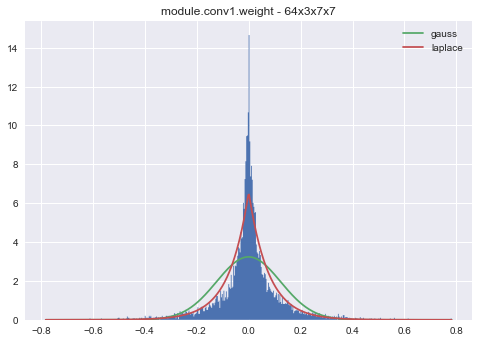

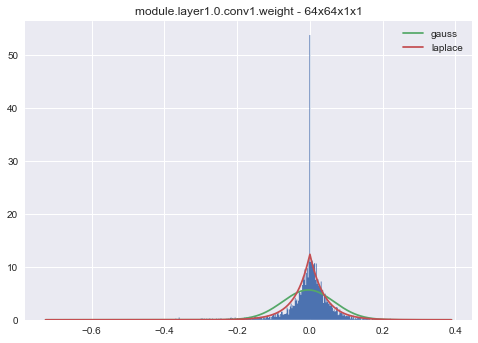

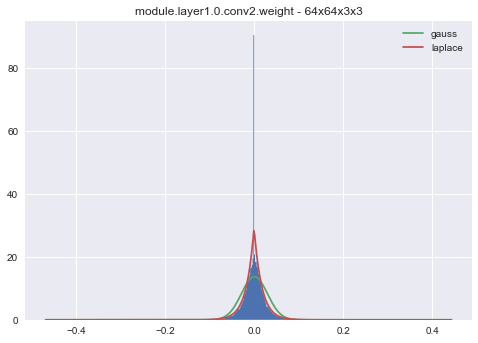

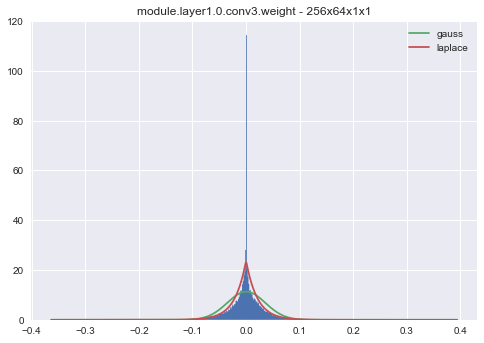

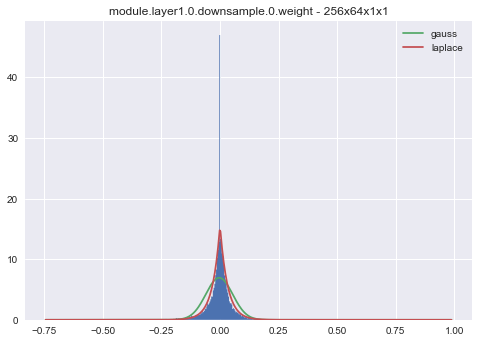

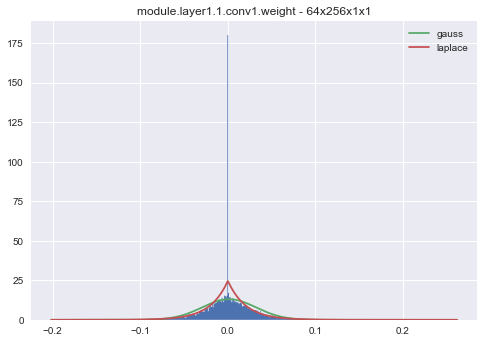

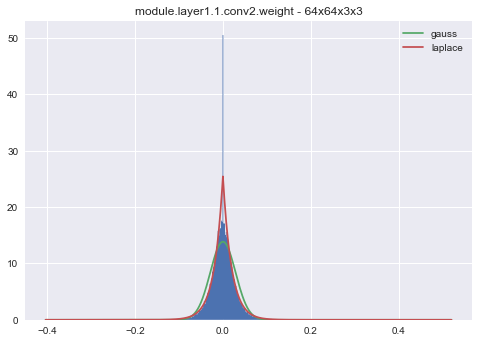

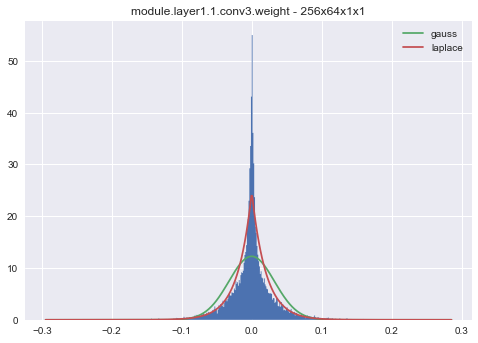

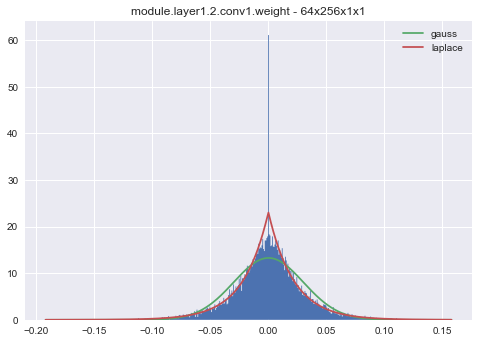

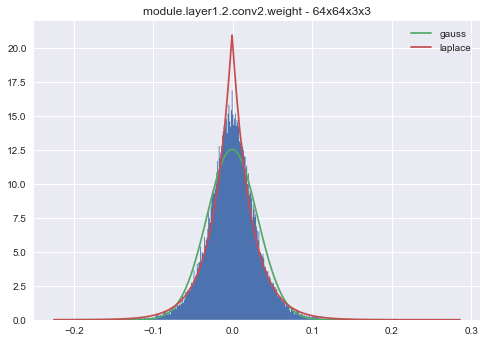

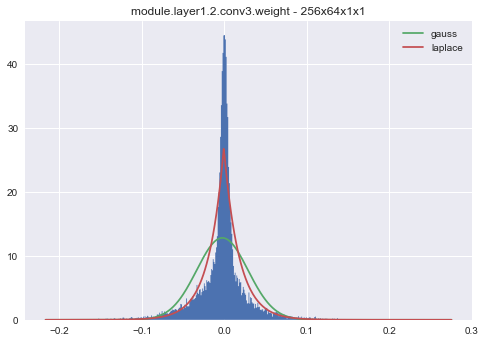

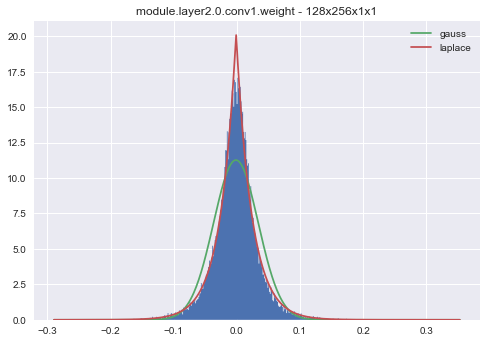

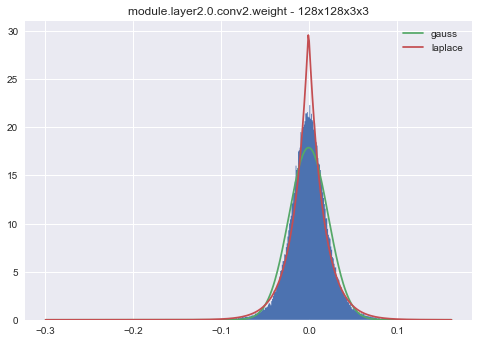

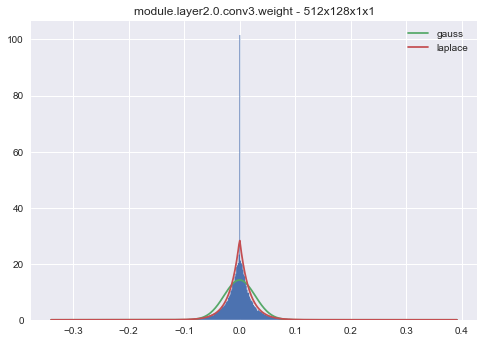

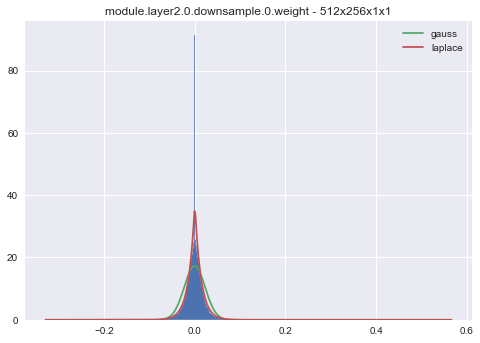

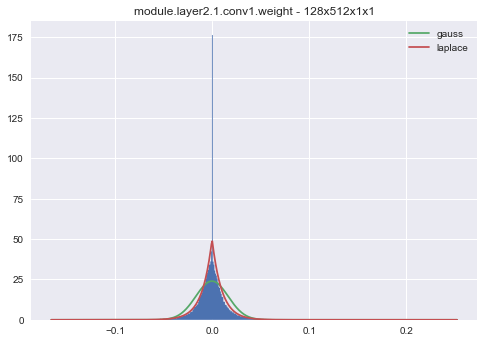

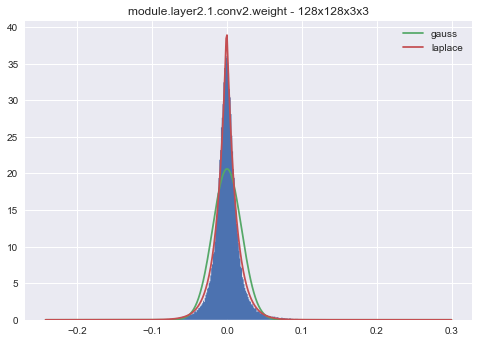

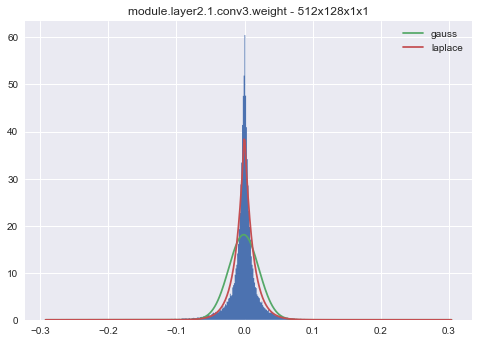

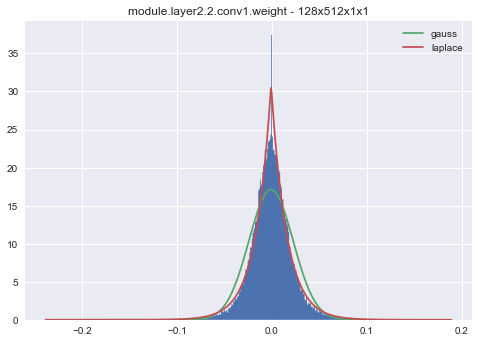

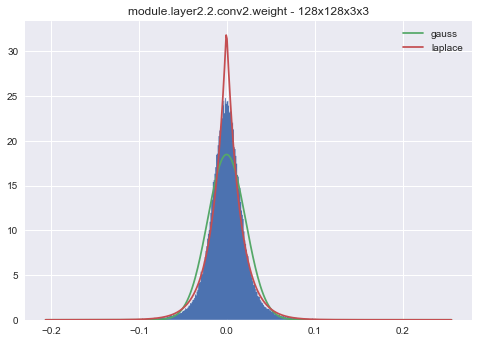

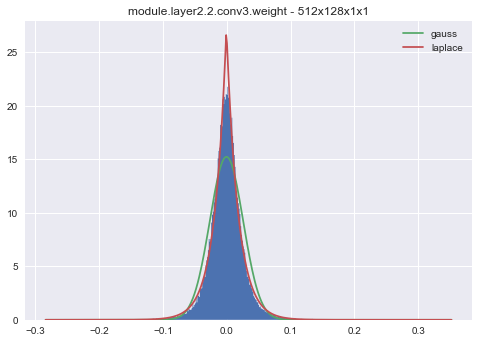

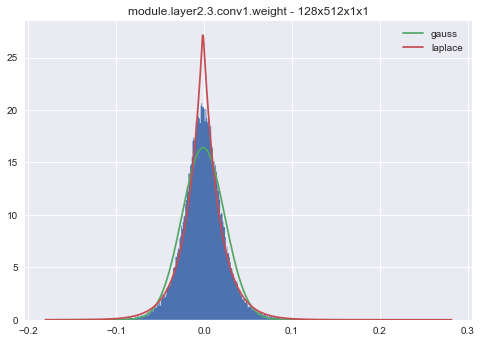

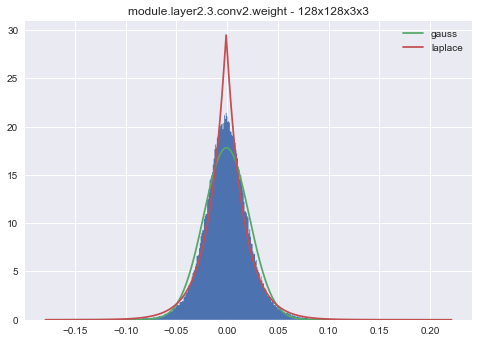

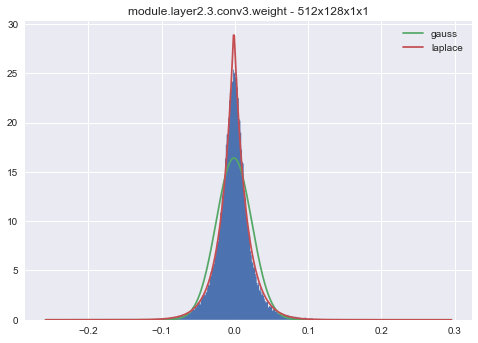

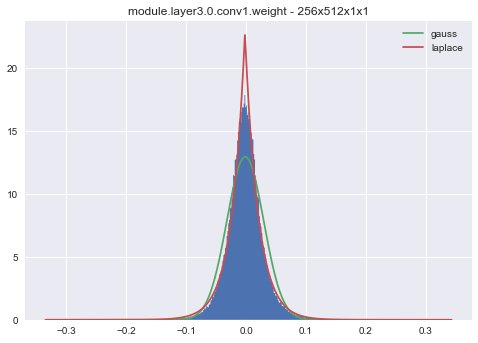

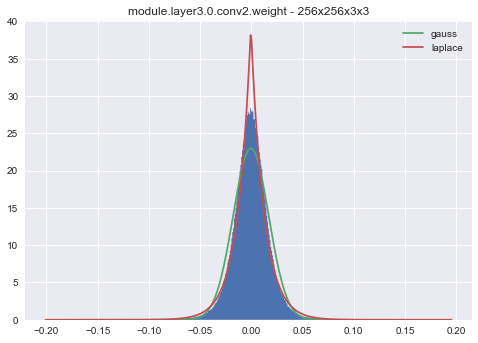

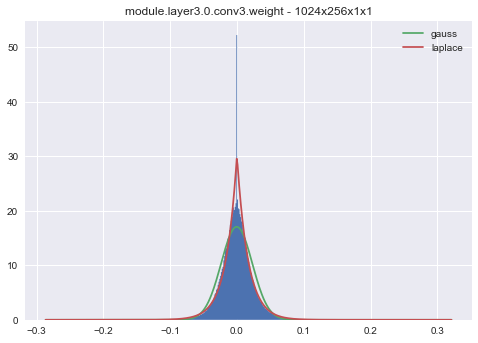

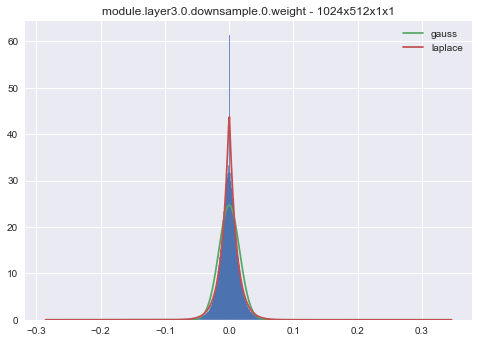

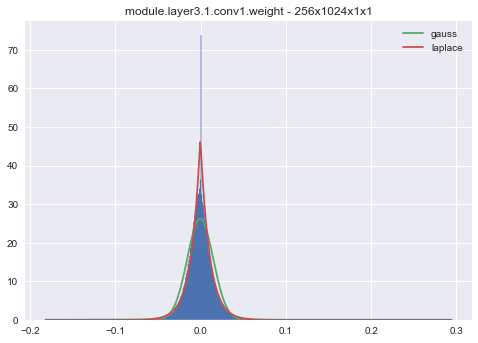

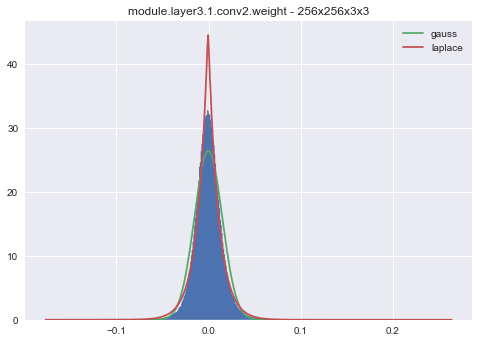

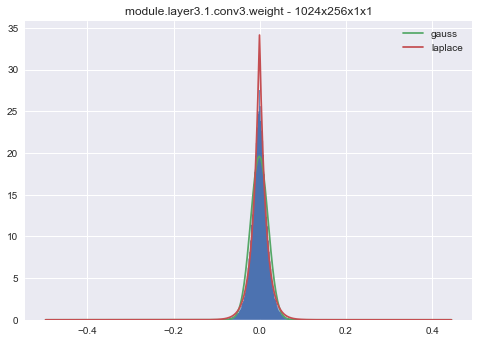

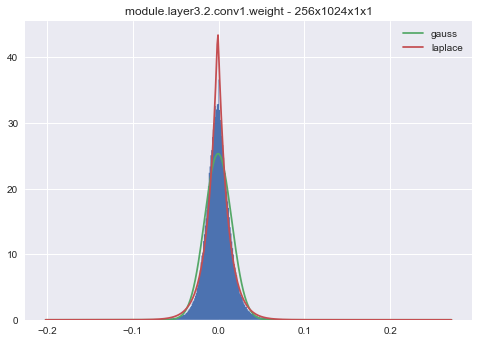

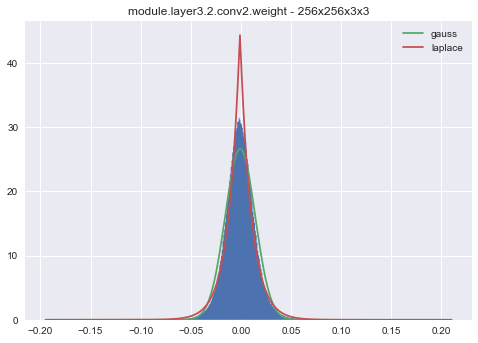

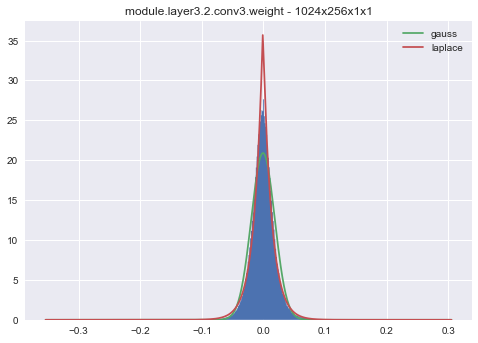

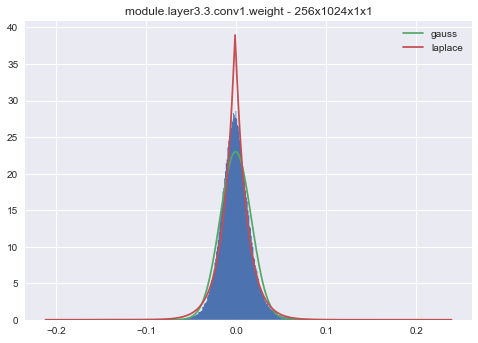

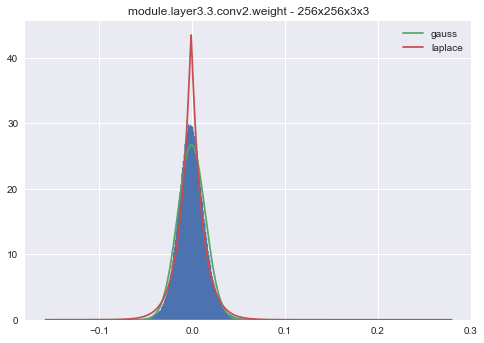

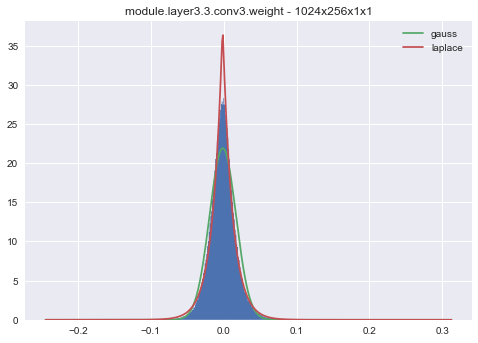

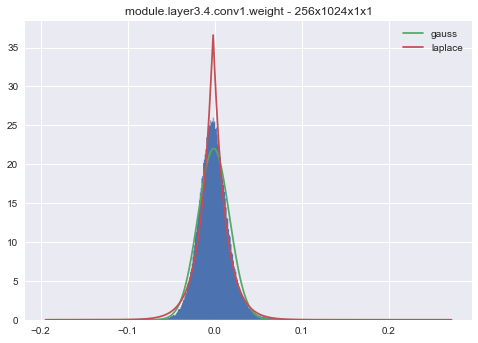

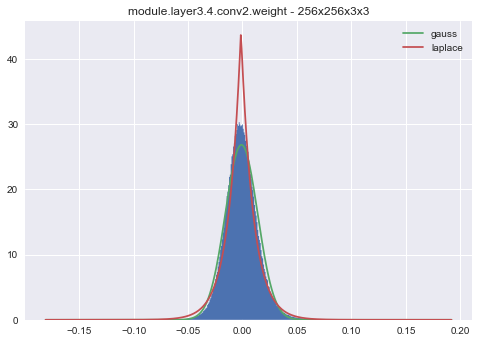

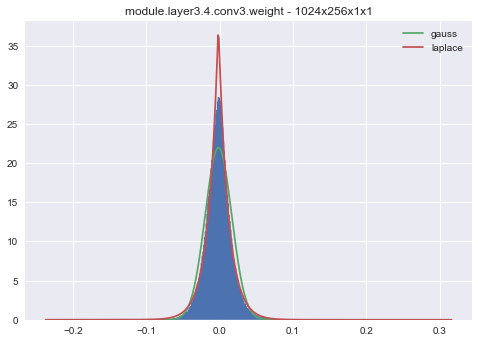

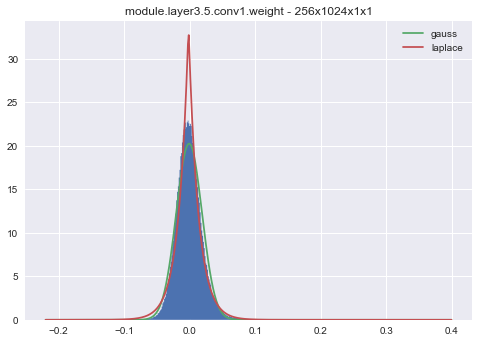

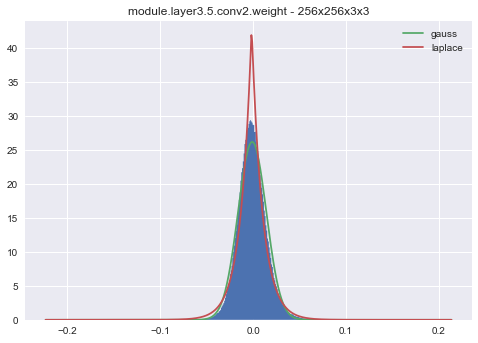

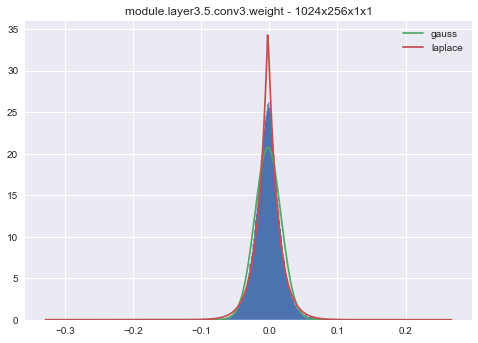

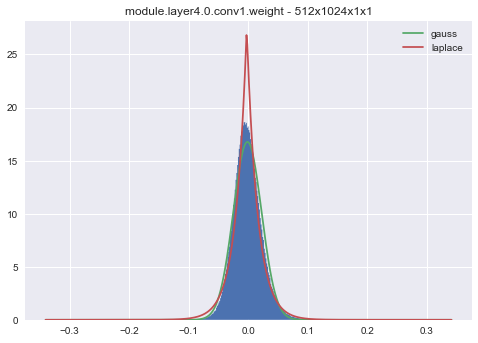

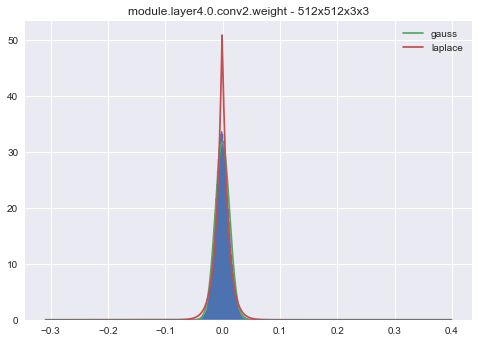

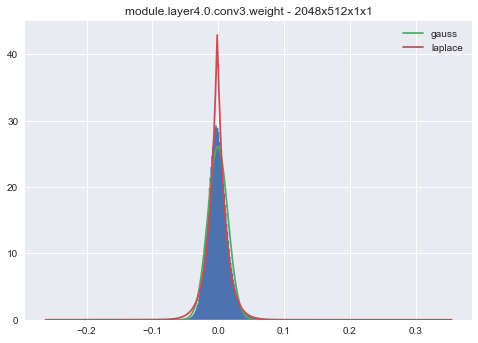

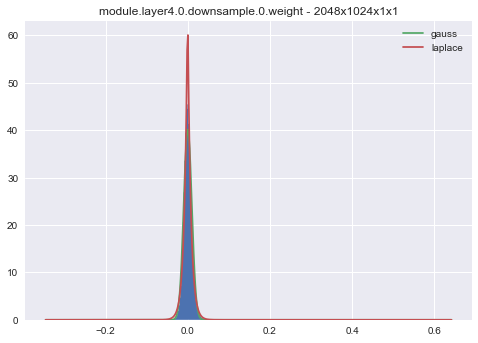

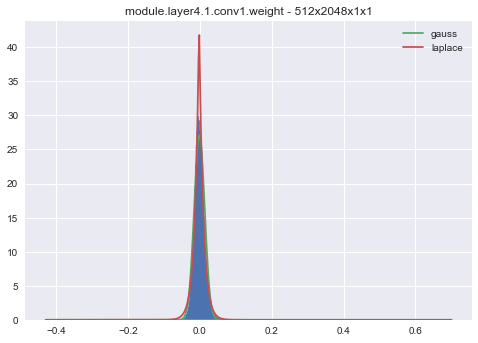

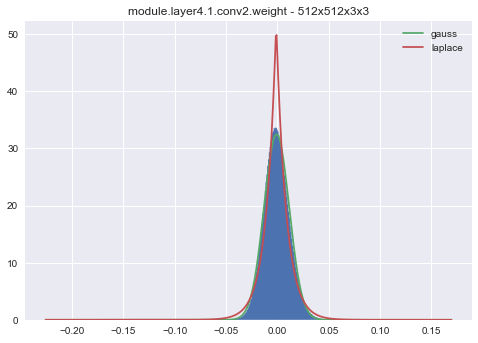

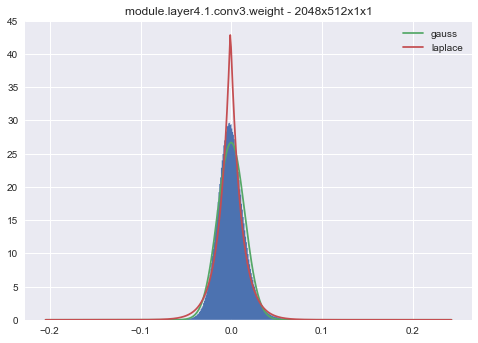

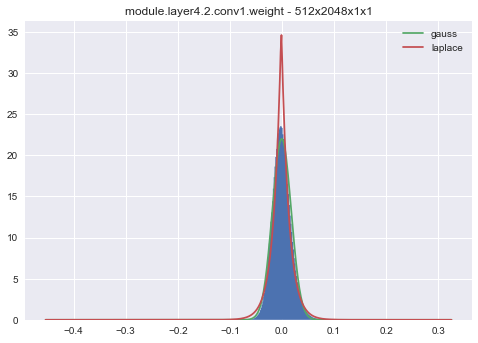

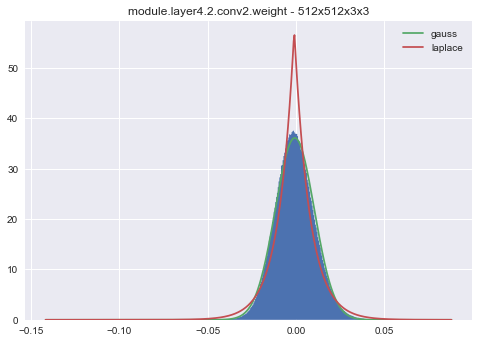

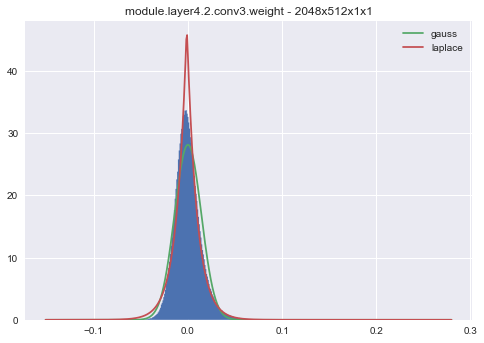

In [22]:
def flatten(weights):
    weights = weights.view(weights.numel())
    weights = weights.data.cpu().numpy()
    return weights

# ================================================================================
REMOVE_ZEROS = False
nbins = 500

# ================================================================================
for name, weights in model.named_parameters():
    if weights.dim() == 4:
        size_str = "x".join([str(s) for s in weights.size()])
        weights = flatten(weights)
        
        # ================================================================================
        if REMOVE_ZEROS:
            # Optionally remove zeros (lots of zeros will dominate the histogram and the 
            # other data will be hard to see
            weights = weights[weights!=0]
        
        # ================================================================================
        # Fit the data to the Normal distribution
        (mean_fitted, std_fitted) = ss.norm.fit(weights)
        x = np.linspace(min(weights), max(weights), nbins)
        weights_gauss_fitted = ss.norm.pdf(x, loc=mean_fitted, scale=std_fitted)
        
        # ================================================================================
        # Fit the data to the Laplacian distribution
        (mean_fitted, std_fitted) = ss.laplace.fit(weights)
        weights_laplace_fitted = ss.laplace.pdf(x, loc=mean_fitted, scale=std_fitted)
        
        # ================================================================================
        n, bins, patches = plt.hist(weights, histtype='stepfilled', 
                                    cumulative=False, bins=nbins, normed=1)
        plt.plot(x, weights_gauss_fitted, label='gauss')
        plt.plot(x, weights_laplace_fitted, label='laplace')
        plt.title(name + " - " +size_str)
        # plt.figure(figsize=(10,5))
        plt.legend()
        plt.show()